In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file 

## Load dataset

In [2]:
N_FEATURES = 123

X_train, y_train = load_svmlight_file('dataset/a9a', n_features=N_FEATURES)
X_val, y_val = load_svmlight_file('dataset/a9a.t', n_features=N_FEATURES)

y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)

## Hyper-parameters

In [3]:
EPOCH_NUM = 250
BATCH_SIZE = 512
LR = 0.008
PENALTY_FACTOR = 0.5
THRESHOLD = 0
C = 0.5

## Hinge Loss function

$ J(w) = max(0,1−y\cdot h_w(x)) $


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(y_, y):
    l = np.maximum(0, 1-y*y_)
    return C * l.sum() / y.shape[0]

## Initialize parameter $w$ with normal distribution

In [5]:
# w = np.random.normal(1, 1, size=(N_FEATURES, 1))
w = np.ones((N_FEATURES, 1))

loss_train = loss(X_train.dot(w), y_train)
loss_val = loss(X_val.dot(w), y_val)
print('loss_train: {:.4f}\tloss_val: {:.4f}'.format(loss_train, loss_val))

loss_train: 5.6366	loss_val: 5.6675


## Train

In [6]:
losses_train, losses_val = [], []
accs_train, accs_val = [], []

for epoch in range(EPOCH_NUM):
    for step in range(X_train.shape[0] // BATCH_SIZE):
        batch_idx = np.random.choice(X_train.shape[0], BATCH_SIZE)
        X, y = X_train[batch_idx], y_train[batch_idx]
        
        X_ = (1 - y * X.dot(w) < THRESHOLD)
        y_ = y.copy()
        y_[X_] = 0
        
        grad = (-1)*(X.T.dot(y_))*C + PENALTY_FACTOR*w
        grad = -grad / X.shape[0]
        
        w += LR * grad
        
    output_train, output_val = X_train.dot(w), X_val.dot(w)
    
    losses_train.append(loss(output_train, y_train))
    losses_val.append(loss(output_val, y_val))
    
    output_train[output_train > THRESHOLD] = 1
    output_train[output_train <= THRESHOLD] = -1
    
    output_val[output_val > THRESHOLD] = 1
    output_val[output_val <= THRESHOLD] = -1
    
    accs_train.append(np.count_nonzero(output_train == y_train)/X_train.shape[0])
    accs_val.append(np.count_nonzero(output_val == y_val)/X_val.shape[0])
    
    if epoch % 10 == 0:
        print('Epoch: #{}\tLoss_train: {:.6f}\tLoss_val: {:.6f}\tAcc_train: {:.4f}\tAcc_val: {:.4f}'.format(
            epoch+1, losses_train[-1], losses_val[-1], accs_train[-1], accs_val[-1])
        )


Epoch: #1	Loss_train: 5.182410	Loss_val: 5.210700	Acc_train: 0.2408	Acc_val: 0.2362
Epoch: #11	Loss_train: 0.759846	Loss_val: 0.760914	Acc_train: 0.4298	Acc_val: 0.4252
Epoch: #21	Loss_train: 0.355668	Loss_val: 0.352569	Acc_train: 0.7355	Acc_val: 0.7349
Epoch: #31	Loss_train: 0.316674	Loss_val: 0.314182	Acc_train: 0.7581	Acc_val: 0.7579
Epoch: #41	Loss_train: 0.292583	Loss_val: 0.290398	Acc_train: 0.7687	Acc_val: 0.7694
Epoch: #51	Loss_train: 0.276607	Loss_val: 0.274529	Acc_train: 0.7774	Acc_val: 0.7785
Epoch: #61	Loss_train: 0.264955	Loss_val: 0.262893	Acc_train: 0.7866	Acc_val: 0.7885
Epoch: #71	Loss_train: 0.255746	Loss_val: 0.253648	Acc_train: 0.7948	Acc_val: 0.7958
Epoch: #81	Loss_train: 0.248042	Loss_val: 0.245935	Acc_train: 0.8007	Acc_val: 0.8014
Epoch: #91	Loss_train: 0.241390	Loss_val: 0.239270	Acc_train: 0.8050	Acc_val: 0.8063
Epoch: #101	Loss_train: 0.235523	Loss_val: 0.233458	Acc_train: 0.8086	Acc_val: 0.8090
Epoch: #111	Loss_train: 0.230283	Loss_val: 0.228321	Acc_train: 0.

## Visualization

### Losses

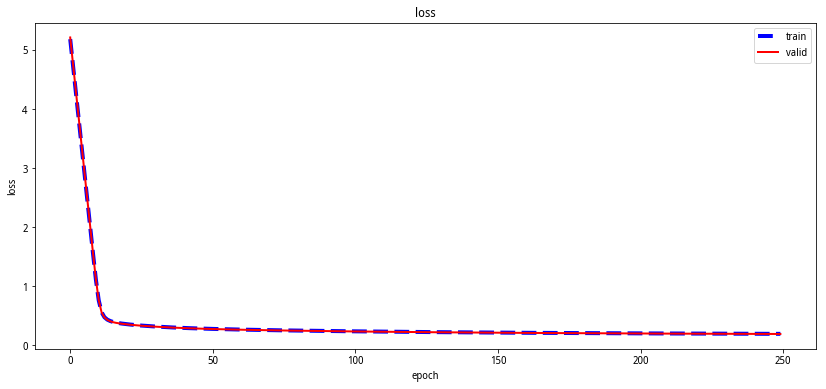

In [7]:
plt.figure(figsize=[14,6])
plt.title('loss')
plt.plot(losses_train, '--', c='b',linewidth=4, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('linear-classification-losses.png')
plt.show()

### Accuracy

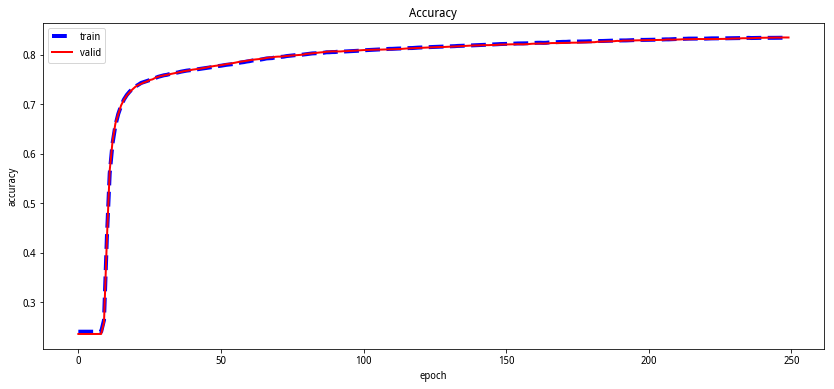

In [8]:
plt.figure(figsize=[14,6])
plt.title('Accuracy')
plt.plot(accs_train, '--', c='b',linewidth=4, label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accs_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('linear-classification-accuracy.png')
plt.show()